In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

/home/sg24duk/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
def boxfilter(imSrc, r):

    hei, wid = imSrc.shape
    imDst = np.zeros_like(imSrc)

    # Cumulative sum over the Y axis
    imCum = np.cumsum(imSrc, axis=0)

    # Difference over the Y axis
    imDst[:r+1, :] = imCum[r:2*r+1, :]
    imDst[r+1:hei-r, :] = imCum[2*r+1:hei, :] - imCum[:hei-2*r-1, :]
    imDst[hei-r:, :] = (imCum[hei-1, :][None, :] - imCum[hei-2*r-1:hei-r-1, :])

    # Cumulative sum over the X axis
    imCum = np.cumsum(imDst, axis=1)

    # Difference over the X axis
    imDst[:, :r+1] = imCum[:, r:2*r+1]
    imDst[:, r+1:wid-r] = imCum[:, 2*r+1:wid] - imCum[:, :wid-2*r-1]
    imDst[:, wid-r:] = (imCum[:, wid-1][:, None] - imCum[:, wid-2*r-1:wid-r-1])

    return imDst


In [17]:
N_vec = np.ones((10,10))

N_box = boxfilter(N_vec,2)

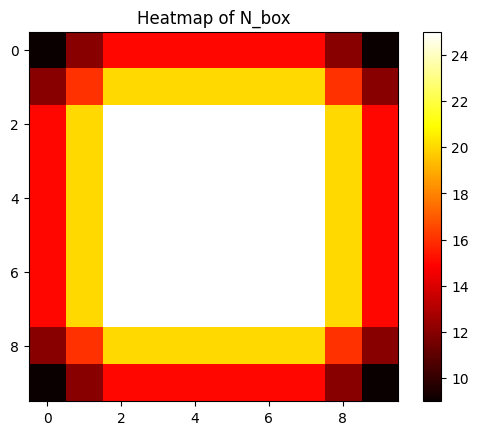

In [18]:
plt.imshow(N_box, cmap='hot', interpolation='nearest')
plt.colorbar()  # Add color bar to show intensity scale
plt.title("Heatmap of N_box")
plt.show()